In [104]:
#pip install --upgrade snowflake-connector-python


In [105]:
#!pip install snowflake-sqlalchemy

In [106]:
#pip install jupyterlab-scheduler

In [107]:
#pip install "snowflake-connector-python[pandas]"

In [108]:
# !pip install seaborn

In [109]:
#pip install sqlalchemy

In [110]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import getpass
import seaborn as sns
import snowflake.connector
%matplotlib inline


In [111]:

conn=snowflake.connector.connect(
    user = 'Smith',
    password ='Smith!@7890',
    account = 'gpzbhpz-xf16896',
    Database='RETAIL',
    schema='PUBLIC',
    warehouse='COMPUTE_WH'
)

In [112]:
cur = conn.cursor()

In [113]:
select_demographic_raw='SELECT * FROM RETAIL.PUBLIC.DEMOGRAPHIC_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM RETAIL.PUBLIC.CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW = 'SELECT * FROM RETAIL.PUBLIC.CAMPAIGN_RAW'
select_COUPON_RAW = 'SELECT * FROM RETAIL.PUBLIC.COUPON_RAW'
select_COUPON_REDMPT_RAW  = 'SELECT * FROM RETAIL.PUBLIC.COUPON_REDEMPT_RAW'
select_PRODUCT_RAW = 'SELECT * FROM RETAIL.PUBLIC.PRODUCT_RAW'
select_TRANSACTION_RAW  = 'SELECT * FROM RETAIL.PUBLIC.TRANSACTION_RAW'

In [114]:
#pip install "snowflake-connector-python[pandas]"

In [115]:
cur.execute(select_demographic_raw)
demographic_raw = cur.fetch_pandas_all()



In [116]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()


In [117]:
#import traceback
#try:
 #   cur.execute(select_CAMPAIGN_DESC_RAW)
  #  CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()
#except Exception as e:
 #   print(traceback.format_exc())

In [118]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [119]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [120]:
cur.execute(select_COUPON_REDMPT_RAW)
COUPON_REDMPT_RAW = cur.fetch_pandas_all()

In [121]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [122]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [123]:
cur.close()
conn.close()

#### Demographic raw This table offers us with information or a summary of the households participated in this campaign.

In [124]:
demographic_raw.head(5)


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


 #### CAMPAIGN_DESC_RAW This table provides an overview of the many sorts of campaigns and the number of days each campaign lasted, along with its unique campaign number.

In [125]:
CAMPAIGN_DESC_RAW.head(5)


,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


#### CAMPAIGN_RAW provides the DESCRIPTION of how many households participated with each campaign number. 

In [126]:
CAMPAIGN_RAW.head(5)


,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


#### COUPON_RAW provides with coupon offer todiffernt products in different campaiagn

In [127]:
COUPON_RAW.head(5)


,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


#### COUPON_REDMPT_RAW tells us how many coupons were redeemed on particular campaign. 

In [128]:
COUPON_REDMPT_RAW.head(5)


,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


#### PRODUCT_RAW describes the product, brand, category, and price with a unique product_id.

In [129]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


#### TRANSACTION_RAW this table gives an overview of costumer of much they basket and spend on the differnet product 

In [130]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


#### Given the start and end dates, the client requested to see them in the start and end dates. Accordingly, the client was instructed to add "2020-01-01" as the data pertains to the years 2020 and 2021. This involved adding the date from January 1, 2020, and converting the days to dates in tables such as TRANSACTION_RAW,CAMPAIGN_DESC_RAW, and COUPON_REDMPT_RAW.

In [131]:
from datetime import datetime,timedelta
start_date = pd.to_datetime('2020-01-01')

In [132]:
TRANSACTION_RAW['Date'] = start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'],unit='D')

In [133]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02


In [134]:
CAMPAIGN_DESC_RAW['START_Date'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'],unit='D')

In [135]:
CAMPAIGN_DESC_RAW['END_Date'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'],unit='D')

In [136]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_Date,END_Date
0,TypeB,24,659,719,2021-10-21,2021-12-20
1,TypeC,15,547,708,2021-07-01,2021-12-09
2,TypeB,25,659,691,2021-10-21,2021-11-22
3,TypeC,20,615,685,2021-09-07,2021-11-16
4,TypeB,23,646,684,2021-10-08,2021-11-15


#### Through this, we will learn the type of campaign and its duration in days. 

In [137]:
CAMPAIGN_DESC_RAW['duration_days'] = CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY']

In [138]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_Date,END_Date,duration_days
0,TypeB,24,659,719,2021-10-21,2021-12-20,60
1,TypeC,15,547,708,2021-07-01,2021-12-09,161
2,TypeB,25,659,691,2021-10-21,2021-11-22,32
3,TypeC,20,615,685,2021-09-07,2021-11-16,70
4,TypeB,23,646,684,2021-10-08,2021-11-15,38


In [139]:
COUPON_REDMPT_RAW['Date'] = start_date + pd.to_timedelta(COUPON_REDMPT_RAW['DAY'],unit='D')

In [140]:
COUPON_REDMPT_RAW.head(5)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20


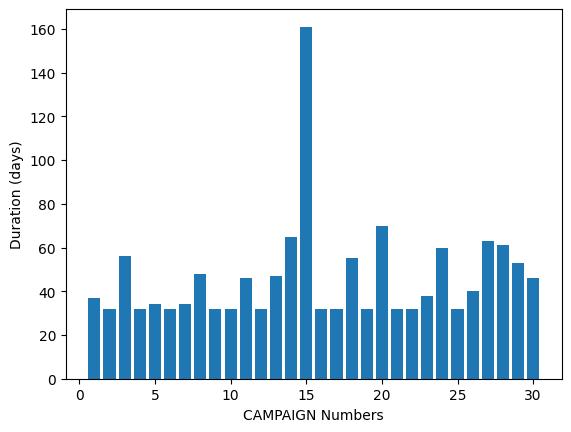

In [141]:
#This graph displays the number of days that a campaign is conducted.  
plt.bar(x='CAMPAIGN', height = 'duration_days',data = CAMPAIGN_DESC_RAW)

# Setting labels for x-axis and y-axis
plt.xlabel('CAMPAIGN Numbers')
plt.ylabel('Duration (days)')

# Showing the plot
plt.show()

In [142]:
CAMPAIGN_DESC_RAW['duration_days'].mean()

46.6

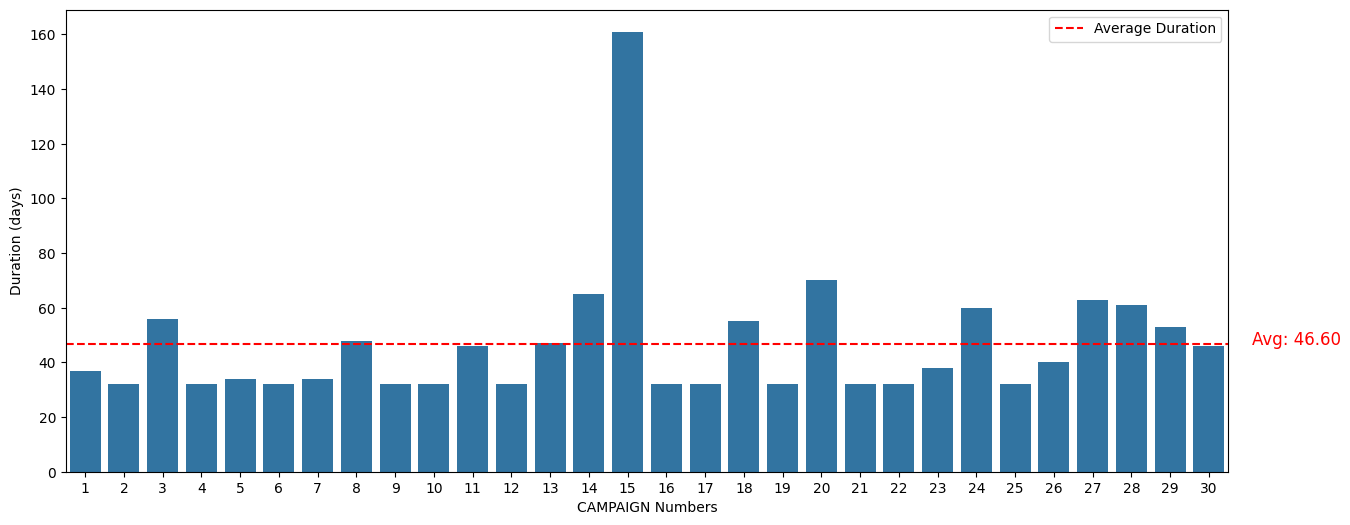

In [143]:

# Assuming CAMPAIGN_DESC_RAW is a DataFrame with 'CAMPAIGN' and 'duration_days' columns

# Create a figure with a specified size
plt.figure(figsize=(15, 6))

# Plotting the bar graph
sns.barplot(data=CAMPAIGN_DESC_RAW, x='CAMPAIGN', y='duration_days')

# Calculate the average duration
average_duration = CAMPAIGN_DESC_RAW['duration_days'].mean()

# Adding the average line
plt.axhline(y=average_duration, color='red', linestyle='--', label='Average Duration')

# Annotating the average duration value on the graph
plt.text(len(CAMPAIGN_DESC_RAW) + 0.1, average_duration, f'Avg: {average_duration:.2f}', color='red', fontsize=12)

# Setting labels for x-axis and y-axis
plt.xlabel('CAMPAIGN Numbers')
plt.ylabel('Duration (days)')

# Showing the plot
plt.legend()  # Add legend for the average line
plt.show()


#### there have been 19 B Type ,whose averge lenght is 38 days.In comparison 6 Type C Campgains  of 75 days on average  

In [144]:
CAMPAIGN_DESC_RAW.groupby(['DESCRIPTION']).aggregate({'CAMPAIGN':'count','duration_days':'mean'})

,CAMPAIGN,duration_days
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


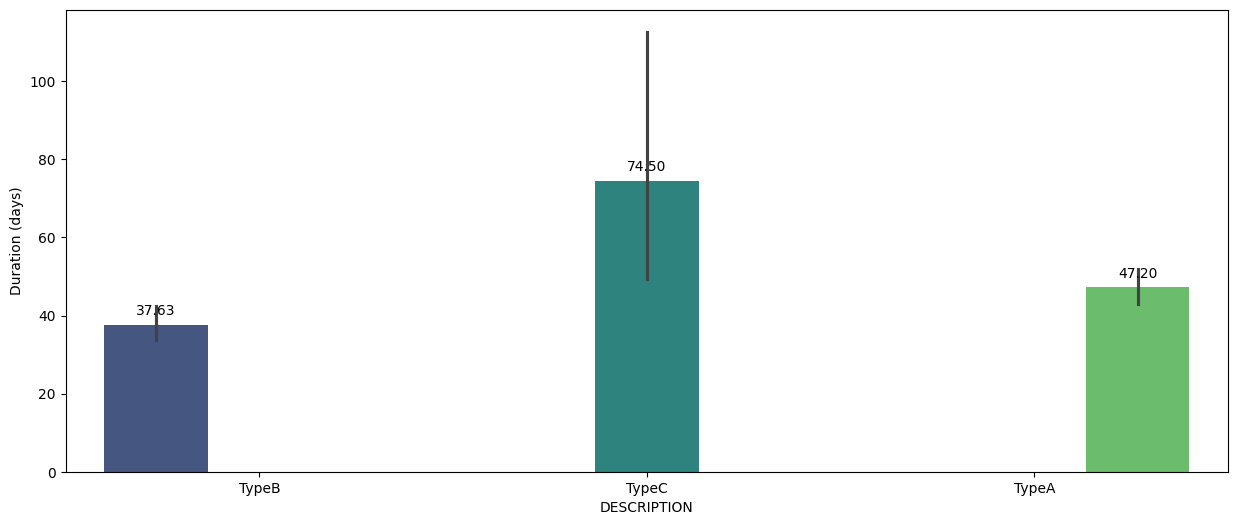

In [145]:

# Assuming CAMPAIGN_DESC_RAW is a DataFrame with 'DESCRIPTION' and 'duration_days' columns

# Create a figure with a specified size
plt.figure(figsize=(15, 6))

# Plotting the bar graph with space between bars
ax = sns.barplot(data=CAMPAIGN_DESC_RAW, x='DESCRIPTION', y='duration_days', hue='DESCRIPTION', palette='viridis', dodge=True)

# Setting labels for x-axis and y-axis
plt.xlabel('DESCRIPTION')
plt.ylabel('Duration (days)')

# Adding annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Showing the plot
plt.show()

#### will extract the month and year for campaign analysis. 

In [146]:
CAMPAIGN_DESC_RAW['start_month'] =  CAMPAIGN_DESC_RAW['START_Date'].dt.strftime('%m')

In [147]:
CAMPAIGN_DESC_RAW['end_month'] =  CAMPAIGN_DESC_RAW['END_Date'].dt.strftime('%m')

In [148]:
CAMPAIGN_DESC_RAW['start_year'] =  CAMPAIGN_DESC_RAW['START_Date'].dt.strftime('%Y')

In [149]:
CAMPAIGN_DESC_RAW['end_year'] =  CAMPAIGN_DESC_RAW['END_Date'].dt.strftime('%Y')

In [150]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_Date,END_Date,duration_days,start_month,end_month,start_year,end_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11,2021,2021
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11,2021,2021


#### OUT OF 2500 HOUSEHOLD ONLY 1584 PARTICIPATED IN CAMPAIGN AND 916 HOUSEHOLD DOESN'T PARTICIPATED IN CAMPAIGN

In [151]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

Text(0, 0.5, 'Number of household reached to')

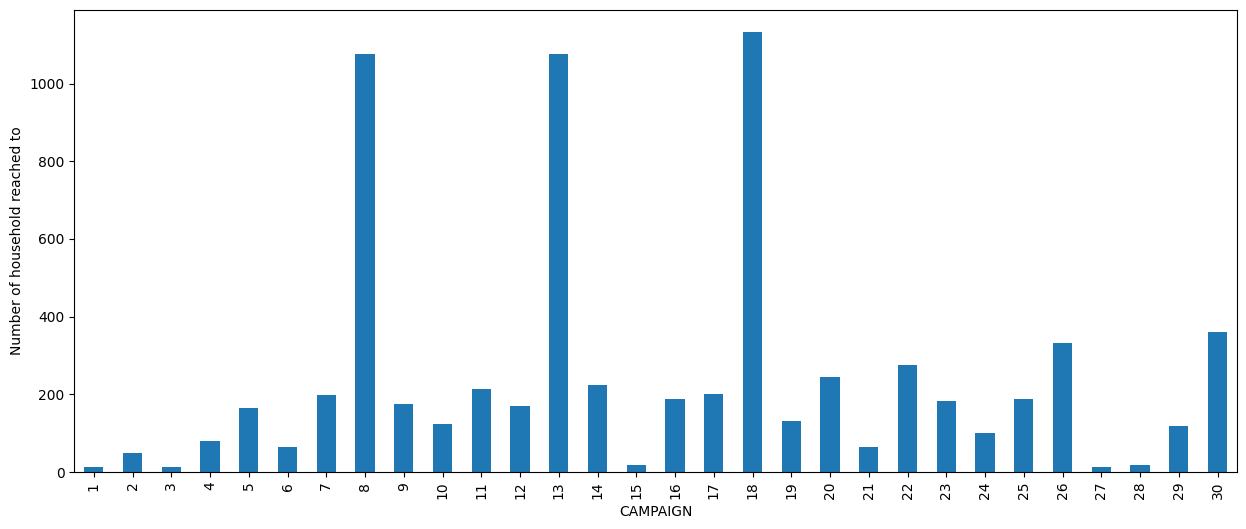

In [152]:
plt.figure(figsize=(15,6))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('Number of household reached to')

#### In Campgain 18 most of the household are participated

In [153]:
COUPON_GIVEN = COUPON_RAW.groupby("CAMPAIGN").agg(Total_product = ('PRODUCT_ID','nunique'),Total_Coupon_Given = ('COUPON_UPC','nunique'))

#### By the aforementioned code, we can see that this many products have coupons to use on them. 

In [154]:
COUPON_GIVEN.sort_values(by = 'Total_product',ascending=False).head(5)

,Total_product,Total_Coupon_Given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181


In [155]:
COUPON_GIVEN = COUPON_GIVEN.merge(right=CAMPAIGN_DESC_RAW,on = 'CAMPAIGN' , how = 'left')

In [156]:
COUPON_GIVEN.head(5)

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,START_Date,END_Date,duration_days,start_month,end_month,start_year,end_year
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021


In [157]:
COUPON_GIVEN.columns

Index(['CAMPAIGN', 'Total_product', 'Total_Coupon_Given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'START_Date', 'END_Date', 'duration_days',
       'start_month', 'end_month', 'start_year', 'end_year'],
      dtype='object')

In [158]:
COUPON_GIVEN.loc[:,('CAMPAIGN', 'Total_product', 'Total_Coupon_Given', 'DESCRIPTION',
       'start_year', 'end_year', 'start_month', 'end_month', 'duration_days')].sort_values(by = 'Total_product',ascending=False)

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,start_year,end_year,start_month,end_month,duration_days
12,13,35616,207,TypeA,2021,2021,05,07,47
17,18,35513,209,TypeA,2021,2021,08,10,55
7,8,17178,209,TypeA,2021,2021,02,04,48
25,26,3396,181,TypeA,2020,2020,08,09,40
29,30,3205,181,TypeA,2020,2021,11,01,46
21,22,1917,21,TypeB,2021,2021,09,10,32
23,24,1887,2,TypeB,2021,2021,10,12,60
15,16,1025,13,TypeB,2021,2021,07,08,32
24,25,826,17,TypeB,2021,2021,10,11,32
8,9,825,18,TypeB,2021,2021,03,04,32


In [159]:
coupon_product = COUPON_RAW.merge(right=PRODUCT_RAW, on = 'PRODUCT_ID',how = 'left')

In [160]:
coupon_product['DEPARTMENT'].value_counts()

DEPARTMENT
GROCERY            51507
DRUG GM            33780
PRODUCE             8276
MEAT                7548
MEAT-PCKGD          7547
COSMETICS           6618
FLORAL              2673
NUTRITION           2281
SEAFOOD-PCKGD       2192
SEAFOOD              751
DELI                 366
GARDEN CENTER        350
MISC. TRANS.         220
SALAD BAR            118
PASTRY               113
TRAVEL & LEISUR       63
FROZEN GROCERY        42
CHEF SHOPPE           32
COUP/STR & MFG        26
MISC SALES TRAN       12
RX                     8
GM MERCH EXP           5
PHOTO                  4
DAIRY DELI             4
PORK                   3
PHARMACY SUPPLY        3
GRO BAKERY             3
HBC                    2
RESTAURANT             1
Name: count, dtype: int64

In [161]:
coupon_product.isnull().sum()

COUPON_UPC              0
PRODUCT_ID              0
CAMPAIGN                0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [162]:
coupon_product['COMMODITY_DESC'].value_counts()

COMMODITY_DESC
HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
                          ... 
SUSHI                        2
BOOKSTORE                    1
COFFEE SHOP                  1
TICKETS                      1
BEVERAGE                     1
Name: count, Length: 266, dtype: int64

In [163]:
COUPON_REDMPT_RAW['COUPON_UPC'].nunique()

556

# only 556 has been used out of 1135

##### below graph represent Right Skew in which mean > median > mode 

<Axes: xlabel='CAMPAIGN'>

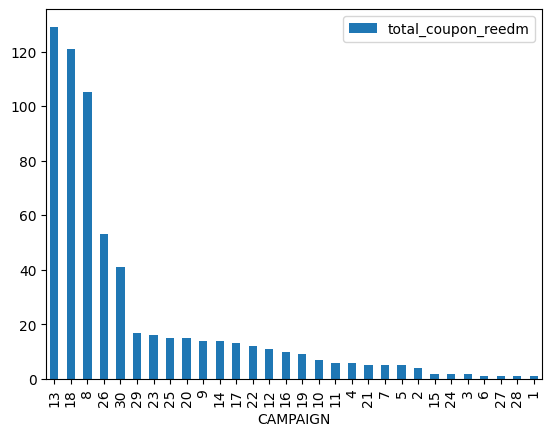

In [164]:
COUPON_REDMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique')).sort_values(by='total_coupon_reedm',ascending=False).plot.bar()

In [165]:
COUPON_REDMPT_RAW

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20
...,...,...,...,...,...
2313,2496,592,54900050076,18,2021-08-15
2314,2496,610,55100000013,18,2021-09-02
2315,2500,449,53663200076,8,2021-03-25
2316,2500,449,54300031076,8,2021-03-25


In [166]:
coupon_redeem = COUPON_REDMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique'))

In [167]:
coupon_redeem

,total_coupon_reedm
CAMPAIGN,
1,1
2,4
3,2
4,6
5,5
6,1
7,5
8,105
9,14


In [168]:
coupon_redeem = coupon_redeem.merge(right = COUPON_GIVEN,on = 'CAMPAIGN',how = 'left' )

In [169]:
coupon_redeem

,CAMPAIGN,total_coupon_reedm,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,START_Date,END_Date,duration_days,start_month,end_month,start_year,end_year
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021
5,6,1,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,01,03,2021,2021
6,7,5,259,8,TypeB,398,432,2021-02-02,2021-03-08,34,02,03,2021,2021
7,8,105,17178,209,TypeA,412,460,2021-02-16,2021-04-05,48,02,04,2021,2021
8,9,14,825,18,TypeB,435,467,2021-03-11,2021-04-12,32,03,04,2021,2021
9,10,7,393,14,TypeB,463,495,2021-04-08,2021-05-10,32,04,05,2021,2021


In [170]:
coupon_redeem['Coupon_redeem_rate'] = (coupon_redeem['total_coupon_reedm']/coupon_redeem['Total_Coupon_Given'])*100

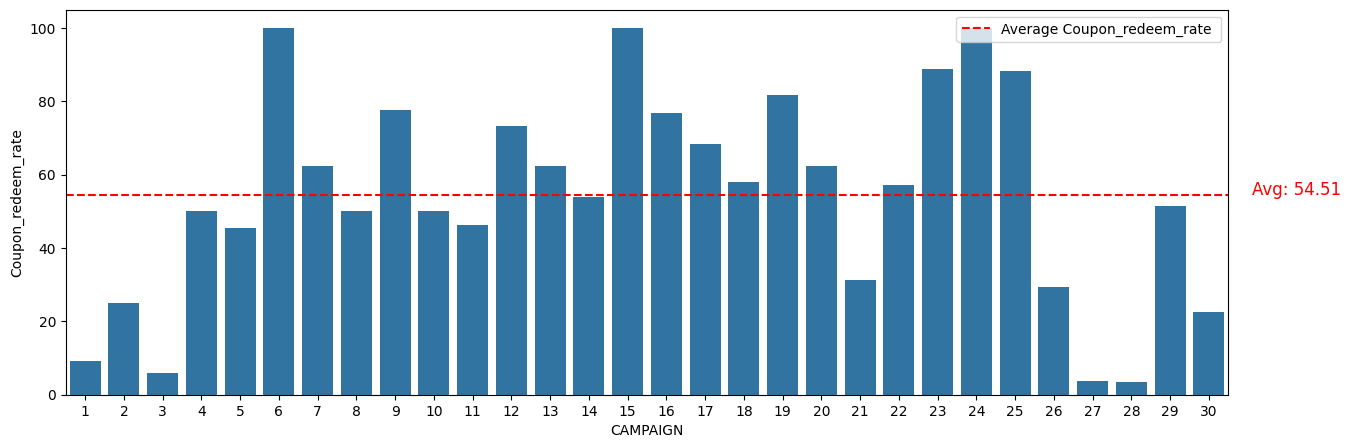

In [171]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Coupon_redeem_rate',data = coupon_redeem)

average_coupon = coupon_redeem['Coupon_redeem_rate'].mean()
# Adding the average line
plt.axhline(y=average_coupon, color='red', linestyle='--', label='Average Coupon_redeem_rate ')
# Annotating the average duration value on the graph
plt.text(len(coupon_redeem) + 0.1, average_coupon, f'Avg: {average_coupon:.2f}', color='red', fontsize=12)

# # Setting labels for x-axis and y-axis
# plt.xlabel('CAMPAIGN Numbers')
# plt.ylabel('Duration (days)')

# Showing the plot
plt.legend()  # Add legend for the average line
plt.show()


In [172]:
TRANSACTION_RAW

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,80,35701232589,530,1106073,1,1.99,412,0.00,1441,76,0,0,2021-06-14
2595728,80,35701232589,530,1118244,2,4.00,412,-1.98,1441,76,0,0,2021-06-14
2595729,80,35701232589,530,12324952,1,0.88,412,-0.51,1441,76,0,0,2021-06-14
2595730,1670,35701234158,530,14112236,1,0.59,412,0.00,1759,76,0,0,2021-06-14


In [173]:
trnx_bucket = TRANSACTION_RAW.groupby('BASKET_ID').aggregate({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

In [174]:
trnx_bucket['use_coupon'] = trnx_bucket['COUPON_DISC'] != 0

In [175]:
trnx_bucket['use_coupon'].value_counts()

use_coupon
False    260812
True      15672
Name: count, dtype: int64

In [176]:
trnx_bucket

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,use_coupon
BASKET_ID,,,,
26984851472,5.91,0,0,False
26984851516,12.43,0,0,False
26984896261,11.37,0,0,False
26984905972,2.55,0,0,False
26984945254,3.53,0,0,False
...,...,...,...,...
42302712006,9.78,0,0,False
42302712189,33.64,0,0,False
42302712298,40.70,0,0,False


In [177]:
trnx_desc = TRANSACTION_RAW.merge(right=trnx_bucket,on = 'BASKET_ID',how = 'left')

In [178]:
trnx_desc

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,use_coupon
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02,5.91,0,0,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02,5.91,0,0,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02,5.91,0,0,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02,5.91,0,0,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02,5.91,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,80,35701232589,530,1106073,1,1.99,412,0.00,1441,76,0,0,2021-06-14,9.74,0,0,False
2595728,80,35701232589,530,1118244,2,4.00,412,-1.98,1441,76,0,0,2021-06-14,9.74,0,0,False
2595729,80,35701232589,530,12324952,1,0.88,412,-0.51,1441,76,0,0,2021-06-14,9.74,0,0,False
2595730,1670,35701234158,530,14112236,1,0.59,412,0.00,1759,76,0,0,2021-06-14,0.59,0,0,False


In [179]:
trnx_desc.drop(['SALES_VALUE_y','COUPON_DISC_y','COUPON_MATCH_DISC_y'],axis = 1,inplace=True)

In [180]:
trnxaction_desc = trnx_desc.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how = 'left')

In [181]:
trnxaction_desc.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE_x', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC_x', 'COUPON_MATCH_DISC_x', 'Date', 'use_coupon',
       'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

In [182]:
commodity_coupon = trnxaction_desc.groupby('COMMODITY_DESC').aggregate(total_quality = ('QUANTITY','count'),
                                                                 use_coupon = ('use_coupon','sum'),
                                                                coupon = ('COUPON_DISC_x','sum'),)

In [183]:
commodity_coupon

,total_quality,use_coupon,coupon
COMMODITY_DESC,,,
,7839,6019,-10596
(CORP USE ONLY),61,5,0
ADULT INCONTINENCE,553,87,-37
AIR CARE,5556,1320,-929
ANALGESICS,4769,692,-13
...,...,...,...
WAREHOUSE SNACKS,9050,1287,-102
WATCHES/CALCULATORS/LOBBY,43,2,0
WATER,2298,155,0


In [184]:
CAMPAIGN_DESC_RAW.head(3)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_Date,END_Date,duration_days,start_month,end_month,start_year,end_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11,2021,2021


In [185]:
CAMPAIGN_DESC_RAW['START_Date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['START_Date']).apply(lambda x : x.date())

In [186]:
CAMPAIGN_DESC_RAW['END_Date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['END_Date']).apply(lambda x : x.date())

In [187]:
CAMPAIGN_DESC_RAW

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_Date,END_Date,duration_days,start_month,end_month,start_year,end_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11,2021,2021
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11,2021,2021
5,TypeB,21,624,656,2021-09-16,2021-10-18,32,09,10,2021,2021
6,TypeB,22,624,656,2021-09-16,2021-10-18,32,09,10,2021,2021
7,TypeA,18,587,642,2021-08-10,2021-10-04,55,08,10,2021,2021
8,TypeB,19,603,635,2021-08-26,2021-09-27,32,08,09,2021,2021
9,TypeB,17,575,607,2021-07-29,2021-08-30,32,07,08,2021,2021


In [188]:
COUPON_REDMPT_RAW

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20
...,...,...,...,...,...
2313,2496,592,54900050076,18,2021-08-15
2314,2496,610,55100000013,18,2021-09-02
2315,2500,449,53663200076,8,2021-03-25
2316,2500,449,54300031076,8,2021-03-25


In [189]:
COUPON_REDMPT_RAW['Date'] = pd.to_datetime(COUPON_REDMPT_RAW['Date']).apply(lambda x : x.date())

In [190]:
COUPON_REDMPT_RAW

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20
...,...,...,...,...,...
2313,2496,592,54900050076,18,2021-08-15
2314,2496,610,55100000013,18,2021-09-02
2315,2500,449,53663200076,8,2021-03-25
2316,2500,449,54300031076,8,2021-03-25


In [191]:
TRANSACTION_RAW

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,80,35701232589,530,1106073,1,1.99,412,0.00,1441,76,0,0,2021-06-14
2595728,80,35701232589,530,1118244,2,4.00,412,-1.98,1441,76,0,0,2021-06-14
2595729,80,35701232589,530,12324952,1,0.88,412,-0.51,1441,76,0,0,2021-06-14
2595730,1670,35701234158,530,14112236,1,0.59,412,0.00,1759,76,0,0,2021-06-14


In [192]:
TRANSACTION_RAW['Date'] = pd.to_datetime(TRANSACTION_RAW['Date']).apply(lambda x : x.date())

In [193]:
CAMPAIGN_DESC_RAW.head(2)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,START_Date,END_Date,duration_days,start_month,end_month,start_year,end_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12,2021,2021


# now loading clean data to db

In [194]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snowctx
from snowflake.connector.pandas_tools import write_pandas
import getpass
import pandas as pd

In [195]:


conn=snowflake.connector.connect(
    user = 'Smith',
    password ='Smith!@7890',
    account = 'gpzbhpz-xf16896',
    Database='RETAIL',
    schema='PUBLIC',
    warehouse='COMPUTE_WH'
)

In [196]:
cur = conn.cursor()

In [197]:
# Use the desired database
cur.execute("USE DATABASE RETAIL")

In [198]:
cur.execute('''
create or replace table CAMPAIGN_DESC_NEW
(
DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER (38,0),
Start_date date,
End_date date,
duration_days NUMBER (38,0),
start_month VARCHAR(10), 
end_month VARCHAR(10),
Start_year  VARCHAR(10),
End_year VARCHAR(10)
)
''')


In [199]:
cur.execute('''
create or replace table COUPON_REDMPT_NEW
(HOUSEHOLD_KEY NUMBER (38,0),
COUPON_UPC NUMBER (38,0),
CAMPAIGN  NUMBER (38,0),
Date Date)''')

In [200]:
cur.execute('''
create or replace table TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER (38,0),
BASKET_ID NUMBER (38,0),
PRODUCT_ID NUMBER (38,0),
QUANTITY  NUMBER (38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER (38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER (38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date)''')

In [201]:
CAMPAIGN_DESC_RAW.drop(['START_DAY','END_DAY'],inplace=True,axis=1)

In [202]:
success,nchunks,nrows,_ = write_pandas(conn,CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [206]:
COUPON_REDMPT_RAW.drop(['DAY'],inplace=True,axis=1)

In [207]:
success,nchunks,nrows,_ = write_pandas(conn,COUPON_REDMPT_RAW,'COUPON_REDMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [213]:
TRANSACTION_RAW.drop(['WEEK_NO'],inplace=True,axis=1)

In [214]:
success,nchunks,nrows,_ = write_pandas(conn,TRANSACTION_RAW,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2595732


In [215]:
cur.close()
conn.close()

In [ ]:
#pip freeze > requirements.txt

In [ ]:
#pip uninstall -r requirements.txt